In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
df = pd.read_excel('data.xlsx')
df.head()

,UniqueCode,Возраст_дни,Пол,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,RDW-CV,RDW-SD,MicroR,MacroR,Железо в сыв.,Ферритин,СРБ
0,0,17703,Женский,7.81,3.94,78.0,27.8,70.6,19.8,281.0,19.5,48.2,30.0,2.6,2.39,20.66,0.41
1,1,16786,Женский,5.77,4.64,133.0,39.5,85.1,28.7,337.0,12.8,39.6,2.4,4.1,12.20,117.00,4.30
2,2,22072,Женский,5.59,5.10,146.0,44.1,86.5,28.6,331.0,12.6,39.8,2.0,4.3,23.60,38.53,1.70
3,3,11731,Женский,5.89,4.47,131.0,39.6,88.6,29.3,331.0,12.2,39.2,1.1,3.5,17.50,48.95,1.00
4,4,19832,Женский,6.61,4.86,136.0,40.0,82.3,28.0,340.0,14.9,44.6,6.0,4.5,14.00,191.60,1.70


Чтение файла и вывод первых пяти строк с помощью метода head().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17019 entries, 0 to 17018
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueCode     17019 non-null  int64  
 1   Возраст_дни    17019 non-null  int64  
 2   Пол            17019 non-null  object 
 3   WBC            17019 non-null  float64
 4   RBC            17019 non-null  float64
 5   HGB            17019 non-null  float64
 6   HCT            17019 non-null  float64
 7   MCV            17019 non-null  float64
 8   MCH            17019 non-null  float64
 9   MCHC           17019 non-null  float64
 10  RDW-CV         17019 non-null  float64
 11  RDW-SD         17019 non-null  float64
 12  MicroR         17019 non-null  float64
 13  MacroR         17019 non-null  float64
 14  Железо в сыв.  17019 non-null  float64
 15  Ферритин       17019 non-null  float64
 16  СРБ            17019 non-null  float64
dtypes: float64(14), int64(2), object(1)
memory usage: 

Оценка данных с помощью метода info.

In [ ]:
df.describe()

,UniqueCode,Возраст_дни,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,RDW-CV,RDW-SD,MicroR,MacroR,Железо в сыв.,Ферритин,СРБ
count,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000,17019.000000
mean,6870.734826,16958.121688,8.077818,4.493058,120.804185,34.048576,75.962608,40.169834,299.861237,22.622158,42.433163,44.995164,5.055597,18.427050,75.400041,13.572398
std,4237.302778,9220.625309,5.962678,4.945098,52.041317,10.919000,26.972714,32.701581,96.190476,23.007022,8.830765,106.564342,4.311485,11.914876,175.117646,62.296790
min,0.000000,73.000000,0.800000,0.100000,2.000000,1.690000,1.200000,13.800000,13.400000,10.900000,17.300000,0.100000,0.100000,1.100000,0.100000,0.007300
25%,3116.500000,9172.500000,5.600000,3.990000,110.000000,33.100000,78.100000,27.500000,320.000000,12.800000,38.400000,1.700000,3.300000,10.200000,12.700000,0.860000
50%,6684.000000,17138.000000,6.870000,4.420000,125.000000,37.100000,85.000000,29.400000,334.000000,13.700000,41.800000,3.500000,3.800000,15.510000,32.350000,2.500000
75%,10494.500000,24824.500000,8.740000,4.780000,137.000000,40.200000,89.300000,31.200000,343.000000,16.450000,45.700000,11.000000,4.300000,22.535000,76.000000,6.000000
max,14611.000000,37963.000000,441.920000,202.660000,2219.000000,115.940000,139.100000,185.000000,1045.000000,124.800000,134.600000,373.000000,59.800000,110.100000,3585.000000,3173.570000


Оценка числовых данных с помощью метода describe

In [ ]:
df['Возраст_года'] = (df['Возраст_дни'] / 365).astype(int)
df = df.drop(columns=['Возраст_дни'])

Перевод значений в столбце Возраст_дни из дней в года, так как будет легче анализировать в дальнейшем. Создание нового столбца Возраст_годы с измененными данными и удаление столбца Возраст_дни.

In [ ]:
df = df[
    (df['HGB'] < 250) &
    (df['WBC'] < 80) &
    (df['MCHC'] < 400) &
    (df['Ферритин'] < 1500) &
    (df['СРБ'] < 500)
]


Обработка нереалистичных значений

In [ ]:
df.head()

,UniqueCode,Пол,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,RDW-CV,RDW-SD,MicroR,MacroR,Железо в сыв.,Ферритин,СРБ,Возраст_года
0,0,Женский,7.81,3.94,78.0,27.8,70.6,19.8,281.0,19.5,48.2,30.0,2.6,2.39,20.66,0.41,48
1,1,Женский,5.77,4.64,133.0,39.5,85.1,28.7,337.0,12.8,39.6,2.4,4.1,12.20,117.00,4.30,45
2,2,Женский,5.59,5.10,146.0,44.1,86.5,28.6,331.0,12.6,39.8,2.0,4.3,23.60,38.53,1.70,60
3,3,Женский,5.89,4.47,131.0,39.6,88.6,29.3,331.0,12.2,39.2,1.1,3.5,17.50,48.95,1.00,32
4,4,Женский,6.61,4.86,136.0,40.0,82.3,28.0,340.0,14.9,44.6,6.0,4.5,14.00,191.60,1.70,54


Проверка изменений

In [ ]:
print(df.isna().sum())

UniqueCode       0
Возраст_дни      0
Пол              0
WBC              0
RBC              0
HGB              0
HCT              0
MCV              0
MCH              0
MCHC             0
RDW-CV           0
RDW-SD           0
MicroR           0
MacroR           0
Железо в сыв.    0
Ферритин         0
СРБ              0
Возраст_годы     0
dtype: int64


С помощью метода isna().sum() происходит подсчет пропусков

In [ ]:
df[df.duplicated()]

,UniqueCode,Пол,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,RDW-CV,RDW-SD,MicroR,MacroR,Железо в сыв.,Ферритин,СРБ,Возраст_годы,Анемия


С помощью метода duplicated() происходит проверка на явные дубликаты

In [ ]:
columns_to_check=['Пол']
for x in columns_to_check:
  print(x,":","\n", df[x].unique(),"\n")

Пол : 
 ['Женский' 'Мужской'] 



Проверка неявных дубликатов

In [ ]:
# 1. Целевая переменная
df['Анемия'] = (df['Ферритин'] < 40).astype(int)

# 2. Кодируем пол
df['Пол_число'] = df['Пол'].map({'Мужской': 1, 'Женский': 0})
df = df.drop(columns=['Пол'])

# 4. Формируем X: все числовые, кроме запрещённых
exclude_cols = ['Ферритин', 'UniqueCode', 'Анемия']
X = df.select_dtypes(include='number').drop(columns=exclude_cols)

# 5. Целевая переменная
y = df['Анемия']


Выделение целевой переменной df['Анемия'] по условию, что df['Ферритин'] < 40. Также происходит создание нового столбца Пол_число и кодирование пола,соответственно.Мужской - 1, Женский - 0. Прежний столбец Пол удаляется. Данные формируются из всего датафрейма, за исключением целевой переменной, ферритина и уникального кода.

In [ ]:
print("Абсолютные значения:")
print(y.value_counts())
print("\nПроценты:")
print(y.value_counts(normalize=True) * 100)

Абсолютные значения:
Анемия
1    9421
0    7416
Name: count, dtype: int64

Проценты:
Анемия
1    55.954149
0    44.045851
Name: proportion, dtype: float64


Количество пациентов у которых выявлена анемия - 9421(56%), у которых не выявлена - 7416(44%), значит можно сделать вывод, что данные сбалансированы

<Figure size 1200x1000 with 0 Axes>

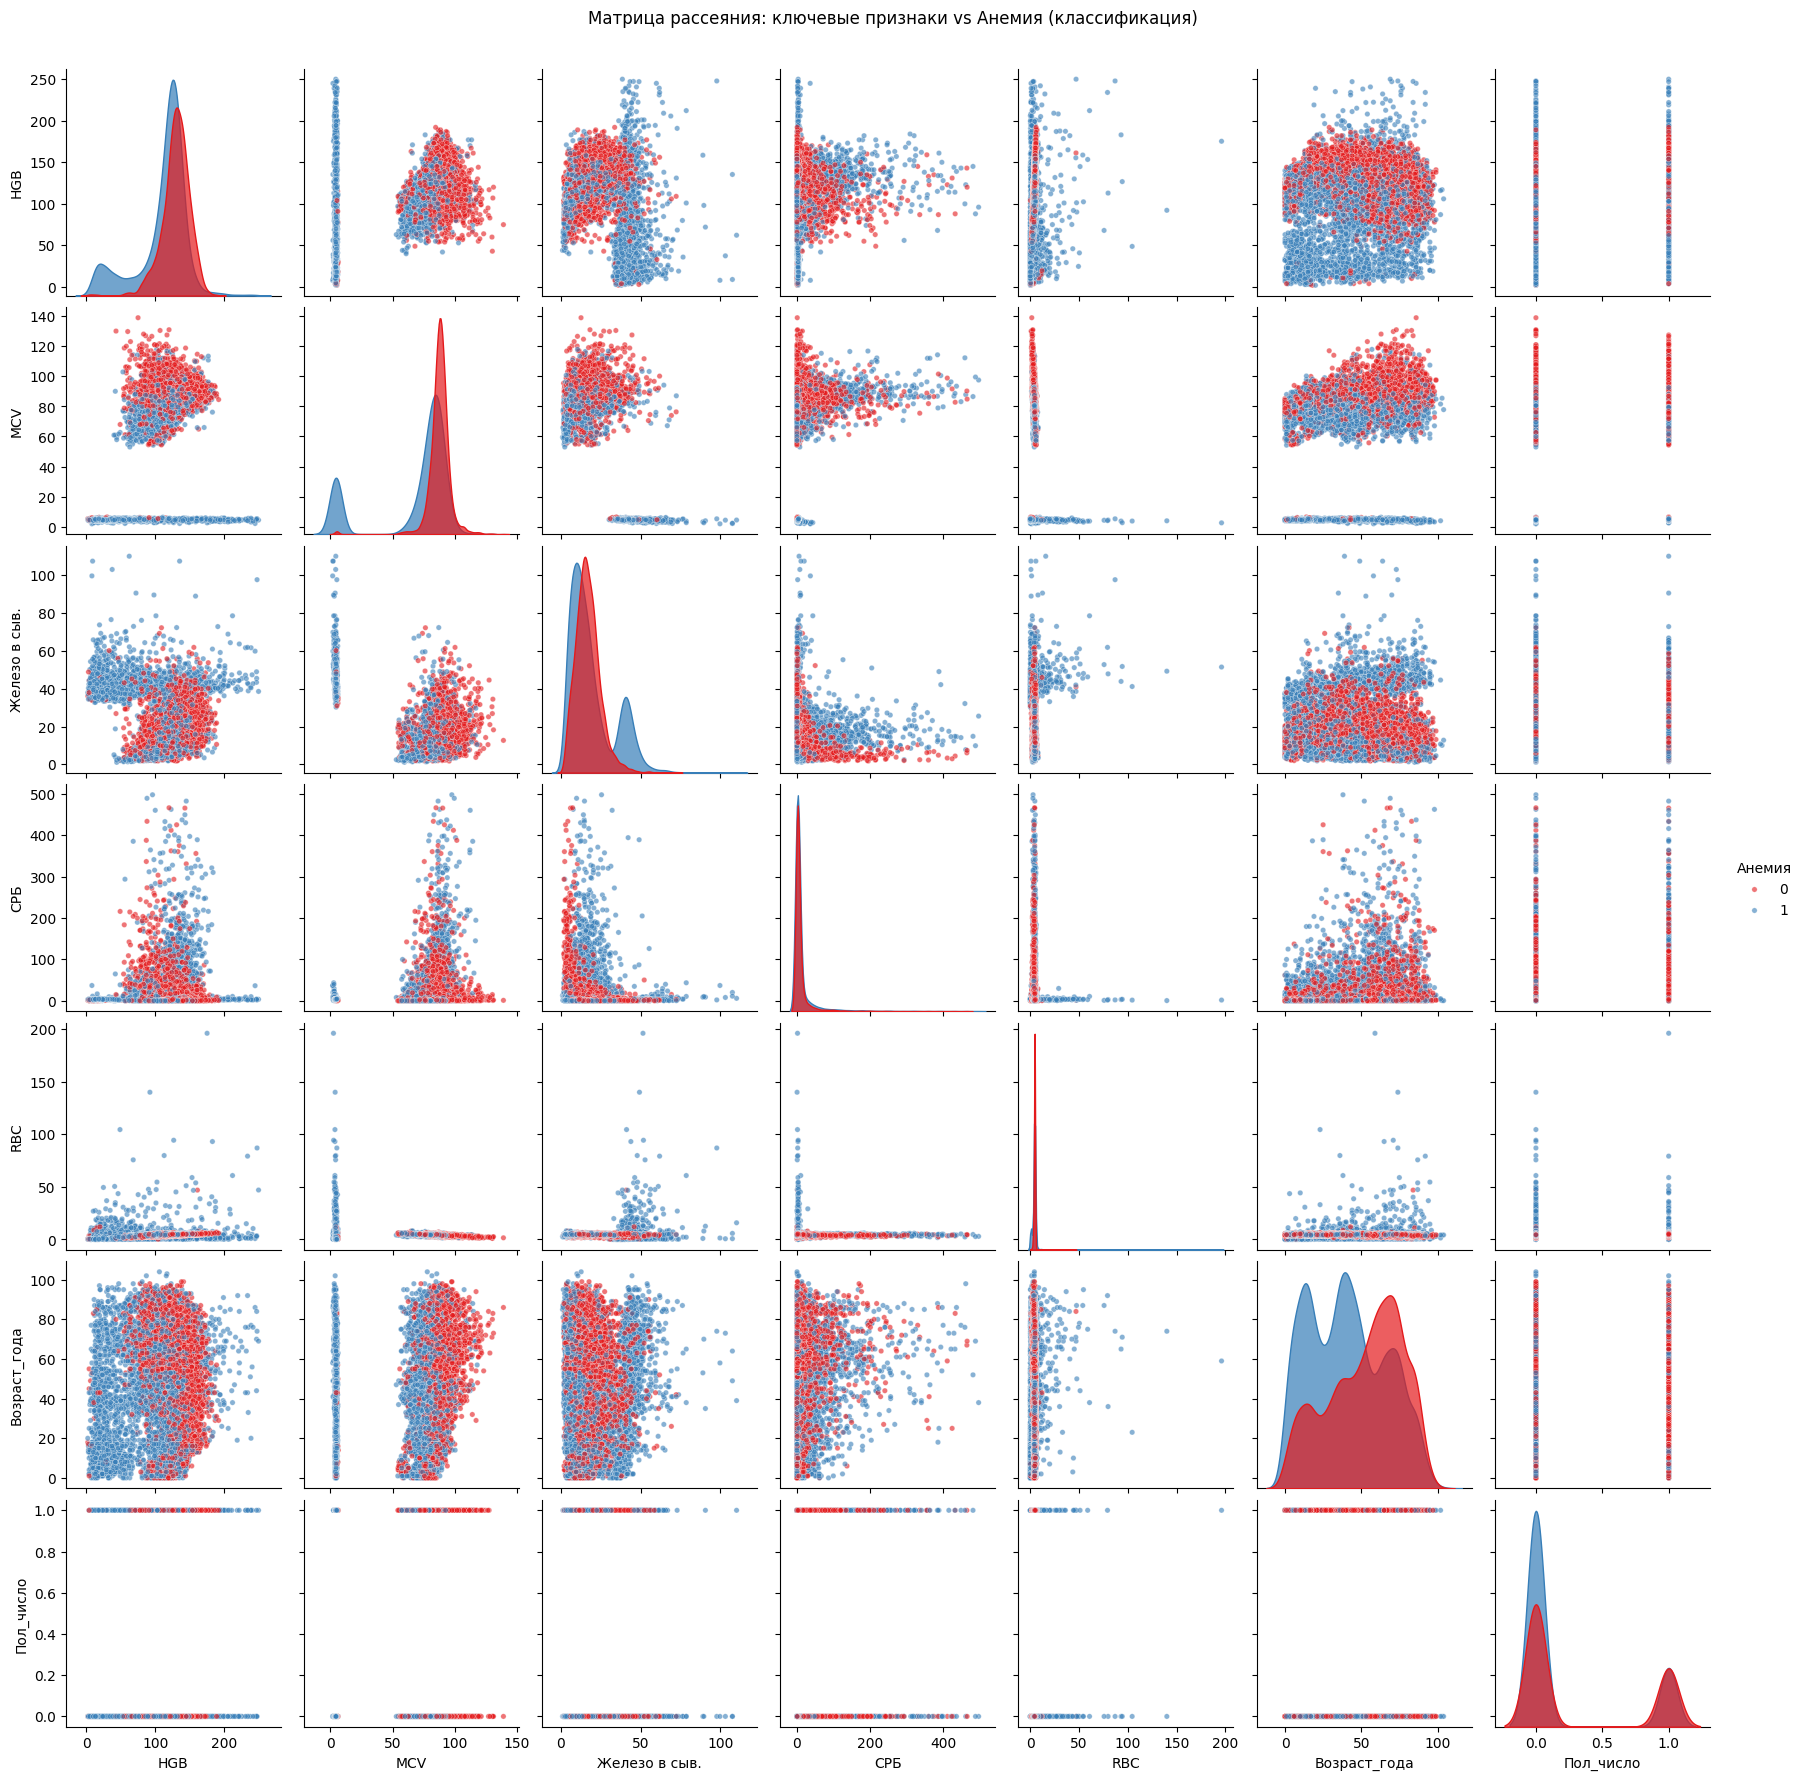

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем ключевые признаки для визуализации
key_features = [
    'HGB', 'MCV', 'Железо в сыв.', 'СРБ',
    'RBC', 'Возраст_года', 'Пол_число'
]

# Формируем датафрейм для визуализации: признаки + целевая переменная
viz_df = X[key_features].copy()
viz_df['Анемия'] = y

# Строим pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(
    viz_df,
    hue='Анемия',
    palette='Set1',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 15},
    diag_kws={'alpha': 0.7, 'fill': True}
)

plt.suptitle('Матрица рассеяния: ключевые признаки vs Анемия (классификация)', y=1.02)
plt.show()

Матрица рассеяния,числовые признаки окрашены по целевой переменной Анемия, где 1 - анемия, 0 - здоров.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разбиваем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Стандартизация:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Разделение данных на обучающую и тестовую выборки. 20% - тестовая выборка, 80% - обучающая. stratify=y - сохраняет пропорции для обучающей и тестовой выборки.fit_transform(X_train) — сначала обучает скалер на X_train (запоминает μ и
σ для каждого столбца), затем применяет преобразование к X_train.
transform(X_test) — применяет те же μ и σ, что были вычислены на обучающей выборке.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
# === Шаг 1: Обучение моделей с GridSearchCV ===
results = {}
y_pred = {}
y_proba = {}

# 1. KNN
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean']}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='recall')
grid_knn.fit(X_train_scaled, y_train)
results['KNN'] = grid_knn
y_pred['KNN'] = grid_knn.predict(X_test_scaled)
y_proba['KNN'] = grid_knn.predict_proba(X_test_scaled)[:, 1]

# 2. Decision Tree
tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {'max_depth': [3, 5, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2] }
grid_tree = GridSearchCV(tree, param_grid_tree, cv=3, scoring='recall')
grid_tree.fit(X_train_scaled, y_train)
results['Decision Tree'] = grid_tree
y_pred['Decision Tree'] = grid_tree.predict(X_test_scaled)
y_proba['Decision Tree'] = grid_tree.predict_proba(X_test_scaled)[:, 1]

# 3. Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear'] }
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='recall')
grid_lr.fit(X_train_scaled, y_train)
results['Logistic Regression'] = grid_lr
y_pred['Logistic Regression'] = grid_lr.predict(X_test_scaled)
y_proba['Logistic Regression'] = grid_lr.predict_proba(X_test_scaled)[:, 1]

# 4. Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
param_grid_rf = {'max_depth': [3, 5, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2] }
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='recall')
grid_rf.fit(X_train_scaled, y_train)
results['Random Forest'] = grid_rf
y_pred['Random Forest'] = grid_rf.predict(X_test_scaled)
y_proba['Random Forest'] = grid_rf.predict_proba(X_test_scaled)[:, 1]


Происходит процесс обучения моделей с помощью метода GridSearchCV, находит такую комбинацию параметров, при которой модель работает лучше всего. Гиперпараметры для метода KNN:
n_neighbors: число соседей — 3, 5 или 7.
weights: одинаковый вклад ('uniform') или взвешенный по расстоянию ('distance').
metric: используется евклидово расстояние.
Гиперпараметры для  Decision Tree:
max_depth: ограничение глубины дерева.
min_samples_split / min_samples_leaf: минимальное число объектов для разделения узла и в листе.
class_weight: включена опция 'balanced', автоматически корректирующая веса классов обратно пропорционально их частоте. Это помогает компенсировать дисбаланс классов.
Гиперпараметры для Logistic Regression:
C: уровень регуляризации (чем меньше, тем сильнее регуляризация).
penalty='l2': гребневая регуляризация.
solver='liblinear': поддерживает L1/L2 и class_weight.
class_weight: включена опция 'balanced' для борьбы с дисбалансом.
Гиперпараметры для Random Forest: аналогичны дереву решений (max_depth, min_samples_split и т.д.), плюс:
class_weight='balanced': применяется ко всем деревьям, чтобы уменьшить смещение в пользу мажоритарного класса.

In [ ]:
# Шаг 2: Расчёт метрик (задание 6)
metrics_data = []

for name in ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']:
    pred = y_pred[name]

    metrics_data.append({
        'Модель': name,
        'Accuracy': round(accuracy_score(y_test, pred), 4),
        'Precision': round(precision_score(y_test, pred), 4),
        'Recall': round(recall_score(y_test, pred), 4),
        'Balanced Accuracy': round(balanced_accuracy_score(y_test, pred), 4),
        'F1 score': round(f1_score(y_test, pred), 4)
    })
df_metrics = pd.DataFrame(metrics_data)

# Вывод таблицы метрик
df_metrics


,Модель,Accuracy,Precision,Recall,Balanced Accuracy,F1 score
0,KNN,0.7577,0.7809,0.7883,0.7536,0.7846
1,Decision Tree,0.7277,0.7283,0.8191,0.7153,0.7710
2,Logistic Regression,0.7405,0.7621,0.7798,0.7352,0.7708
3,Random Forest,0.7821,0.8047,0.8064,0.7788,0.8055


Этот блок кода вычисляет и собирает основные метрики качества классификации для каждой из четырёх обученных моделей (KNN, Decision Tree, Logistic Regression, Random Forest) на тестовом наборе данных (y_test).

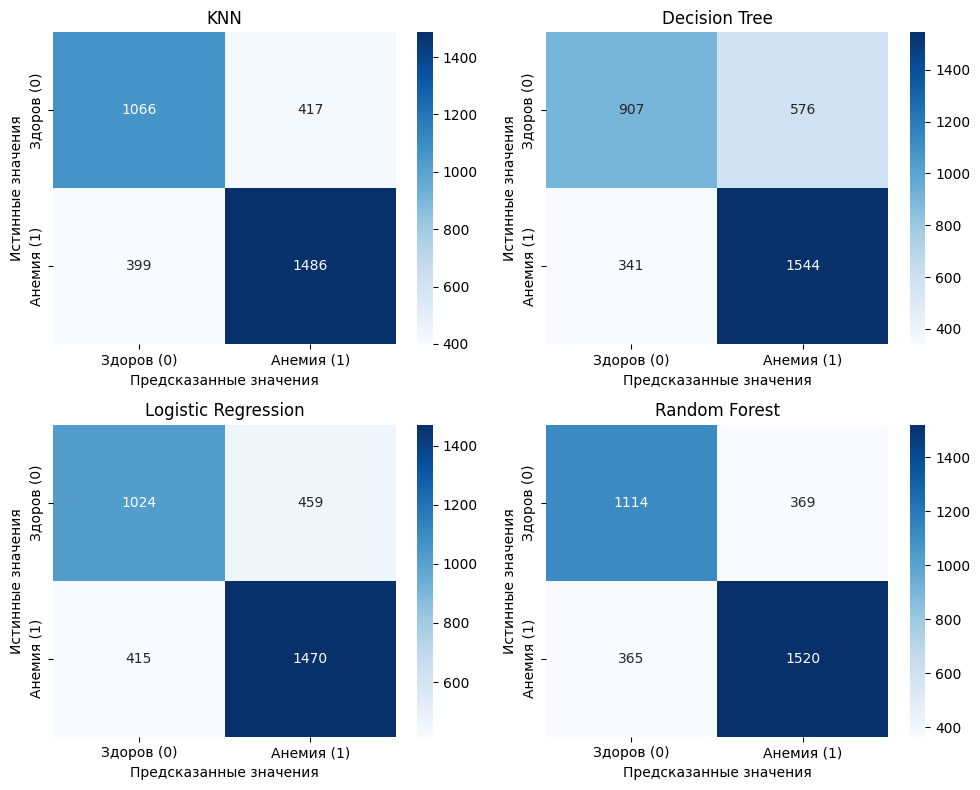

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Названия моделей
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, name in enumerate(model_names):
    # Получаем предсказания модели
    y_pred_model = y_pred[name]

    # Строим матрицу ошибок
    cm = confusion_matrix(y_test, y_pred_model)

    # Визуализируем с помощью heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Здоров (0)', 'Анемия (1)'],
                yticklabels=['Здоров (0)', 'Анемия (1)'],
                ax=axes[i])

    axes[i].set_title(f'{name}')
    axes[i].set_ylabel('Истинные значения')
    axes[i].set_xlabel('Предсказанные значения')

plt.tight_layout()
plt.show()

Здесь происходит визуализация матрицы ошибок для всех четырёх обученных моделей — KNN, Decision Tree, Logistic Regression и Random Forest — на тестовой выборке.
Random Forest: Наибольшее число TP (1520) — хорошо находит анемию. Низкое число FN (365) — мало пропущенных случаев. FP = 369 — немного ложных тревог, но приемлемо. Лучшая модель по recall и балансу между точностью и полнотой.
Decision Tree: TP = 1544 — почти так же хорошо, как RF. FN = 341 — чуть меньше пропусков, чем у RF. Но FP = 576 — больше ложных срабатываний. Хорошо находит анемию, но хуже фильтрует здоровых.
KNN: TP = 1486 — хуже, чем RF и DT. FN = 399 — больше пропущенных случаев.
Logistic Regression: TP = 1470 — наименьшее среди всех. FN = 415 — наибольшее число пропущенных случаев. Самая слабая по выявлению анемии.

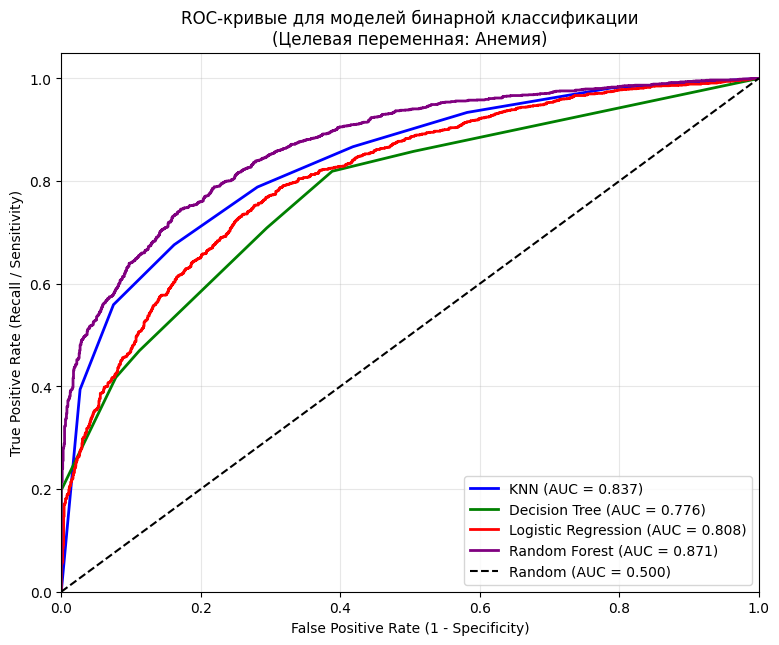

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Названия моделей
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']

# Размер графика
plt.figure(figsize=(9, 7))

# Цвета для каждой модели (опционально)
colors = ['blue', 'green', 'red', 'purple']

for i, name in enumerate(model_names):
    # Получаем вероятности положительного класса (анемия = 1)
    y_proba_model = y_proba[name]

    # Вычисляем FPR, TPR и пороги
    fpr, tpr, _ = roc_curve(y_test, y_proba_model)

    # Считаем AUC
    roc_auc = auc(fpr, tpr)

    # Рисуем кривую
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--', label='Random (AUC = 0.500)')

# Оформление
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall / Sensitivity)')
plt.title('ROC-кривые для моделей бинарной классификации\n(Целевая переменная: Анемия)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

На графике представлены ROC-кривые (Receiver Operating Characteristic) для четырёх моделей бинарной классификации, где целевая переменная — Анемия (1). Каждая кривая показывает зависимость True Positive Rate (Recall / Sensitivity) от False Positive Rate (1 - Specificity) при различных порогах классификации.
Ключевой метрикой оценки качества является AUC (Area Under the Curve) — площадь под кривой. Чем выше AUC, тем лучше модель различает классы.
Random Forest-0.871 - лучшая модель — наибольшая площадь под кривой, значит, она наиболее точно разделяет классы «Здоров» и «Анемия».
KNN - 0.837 - хорошее качество, чуть уступает Random Forest.
Logistic Regression - 0.808 - умеренно хорошая модель, стабильна, но менее мощная, чем RF и KNN.
Decision Tree - 0.776 - наименее эффективная из всех — худший AUC, значит, хуже всего отделяет классы.

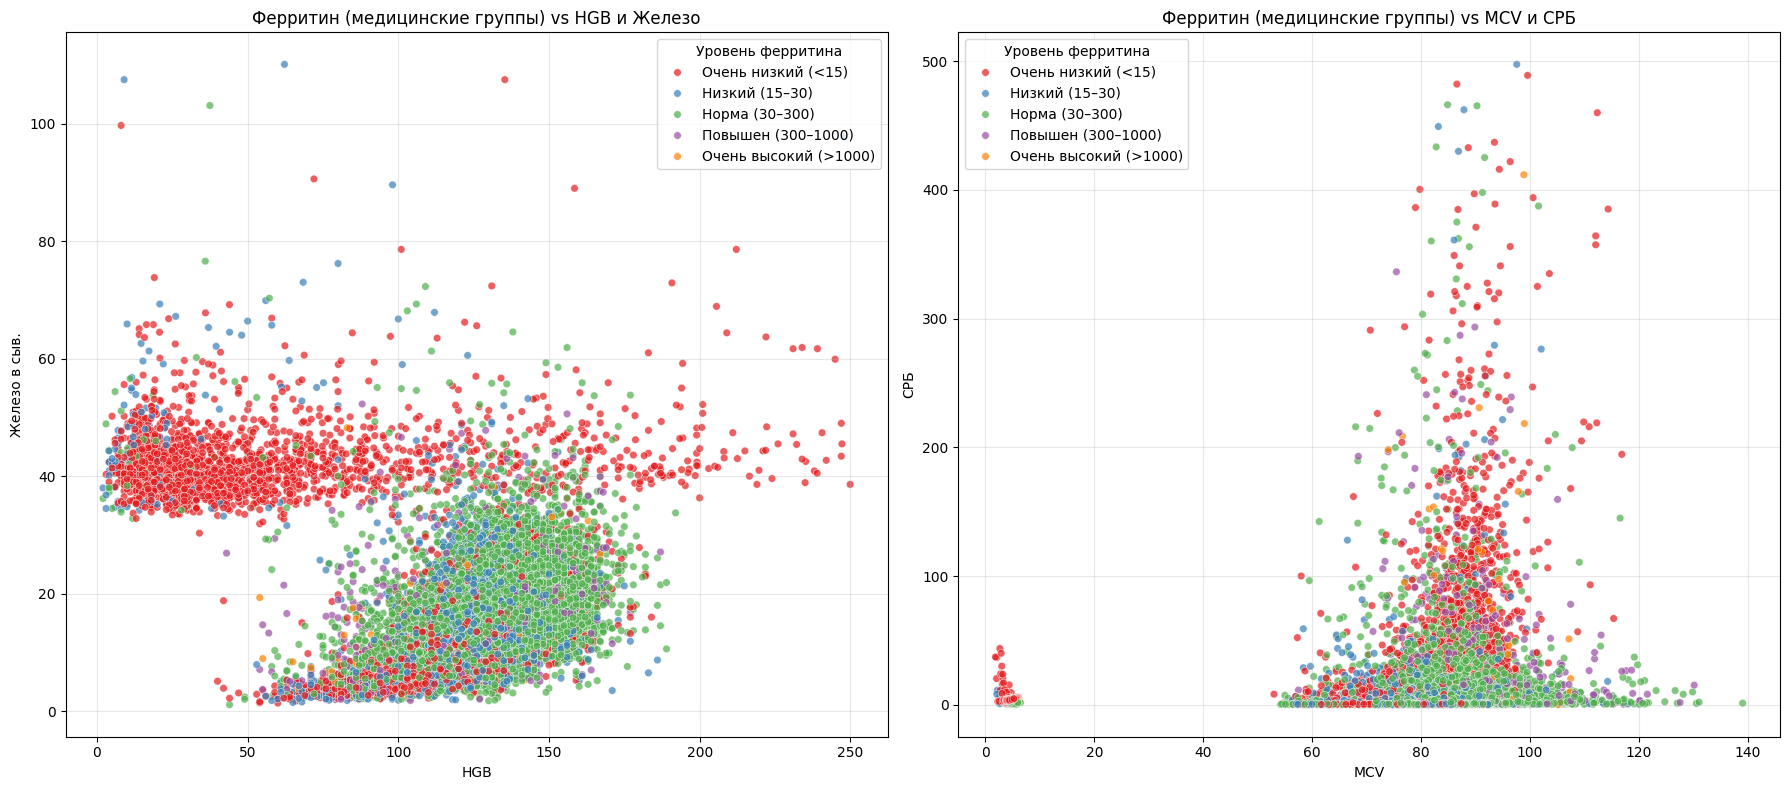

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Создаём осмысленные медицинские категории ферритина
df['Ферритин_группа'] = pd.cut(
    df['Ферритин'],
    bins=[0, 15, 30, 300, 1000, df['Ферритин'].max() + 1],
    labels=['Очень низкий (<15)', 'Низкий (15–30)', 'Норма (30–300)', 'Повышен (300–1000)', 'Очень высокий (>1000)'],
    include_lowest=True
)
# Удаляем строки, где ферритин NaN (если есть)
df_clean = df.dropna(subset=['Ферритин_группа'])
# Строим графики
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
# Цвета: от тёмно-красного (дефицит) до тёмно-фиолетового (очень высокий)
palette = 'Set1'
# HGB + Железо
sns.scatterplot(
    data=df_clean,
    x='HGB',
    y='Железо в сыв.',
    hue='Ферритин_группа',
    palette=palette,
    alpha=0.7,
    s=30,
    ax=axes[0]
)
axes[0].set_title('Ферритин (медицинские группы) vs HGB и Железо')
axes[0].grid(True, alpha=0.3)
axes[0].legend(title='Уровень ферритина')
# MCV + СРБ
sns.scatterplot(
    data=df_clean,
    x='MCV',
    y='СРБ',
    hue='Ферритин_группа',
    palette=palette,
    alpha=0.7,
    s=30,
    ax=axes[1]
)
axes[1].set_title('Ферритин (медицинские группы) vs MCV и СРБ')
axes[1].grid(True, alpha=0.3)
axes[1].legend(title='Уровень ферритина')
plt.tight_layout()
plt.show()

Левый график:
Точки с низким ферритином (красные/синие) — в основном при низком HGB (<120–130).
Точки с нормальным ферритином (зелёные) — при HGB ≥ 120
При очень низком ферритине (красные) — железо в сыворотке тоже низкое (обычно <40).
При нормальном ферритине (зелёные) — железо в сыворотке может быть в норме или выше.
Правый график:
При низком ферритине (красные/синие) — MCV снижен (<80) → микроцитарная анемия.
При нормальном ферритине (зелёные) — MCV в норме (80–100).
При повышенном СРБ (>50–100) — часто ферритин повышен или в норме, несмотря на низкий HGB.


Вывод
Была выделена целевая переменная Анемия, при условии, что железо меньше 40, построена матрица рассеивания по числовым признакам и обучены 4 модели: KNN, Decision Tree, Logistic Regression и Random Forest.
Визуализация матрицы ошибок для всех четырёх обученных моделей — KNN, Decision Tree, Logistic Regression и Random Forest — на тестовой выборке показала:
Random Forest: Наибольшее число TP (1520) — хорошо находит анемию. Низкое число FN (365) — мало пропущенных случаев. FP = 369 — немного ложных тревог, но приемлемо. Лучшая модель по recall и балансу между точностью и полнотой.
Decision Tree: TP = 1544 — почти так же хорошо, как RF. FN = 341 — чуть меньше пропусков, чем у RF. Но FP = 576 — больше ложных срабатываний. Хорошо находит анемию, но хуже фильтрует здоровых.
KNN: TP = 1486 — хуже, чем RF и DT. FN = 399 — больше пропущенных случаев.
Logistic Regression: TP = 1470 — наименьшее среди всех. FN = 415 — наибольшее число пропущенных случаев. Самая слабая по выявлению анемии.

ROC-кривые:
Самой эффективной моделью для выявления анемии оказался Random Forest (AUC = 0.871) — он демонстрирует наилучшую способность отличать пациентов с анемией от здоровых при любом выбранном пороге. KNN и Logistic Regression также показывают хорошие результаты, а Decision Tree — заметно уступает. Это согласуется с предыдущими результатами: Random Forest имеет высокий recall и низкое количество ложных отрицательных (FN), что критично в медицинской диагностике — лучше ошибиться "в сторону избытка", чем пропустить болезнь.

Последние графики наглядно демонстрируют взаимосвязь уровня ферритина с ключевыми маркерами анемии — HGB, железо, MCV и СРБ. Низкий ферритин - типичная картина железодефицитной анемии: низкий HGB, низкое железо, низкий MCV.
Высокий ферритин при высоком СРБ - возможна анемия хронических заболеваний, где железо «заперто» в тканях.
Выбросы и пересечения групп указывают на сложные клинические случаи — например, смешанную анемию или аномалии лабораторных данных.

Дополнительное задание:

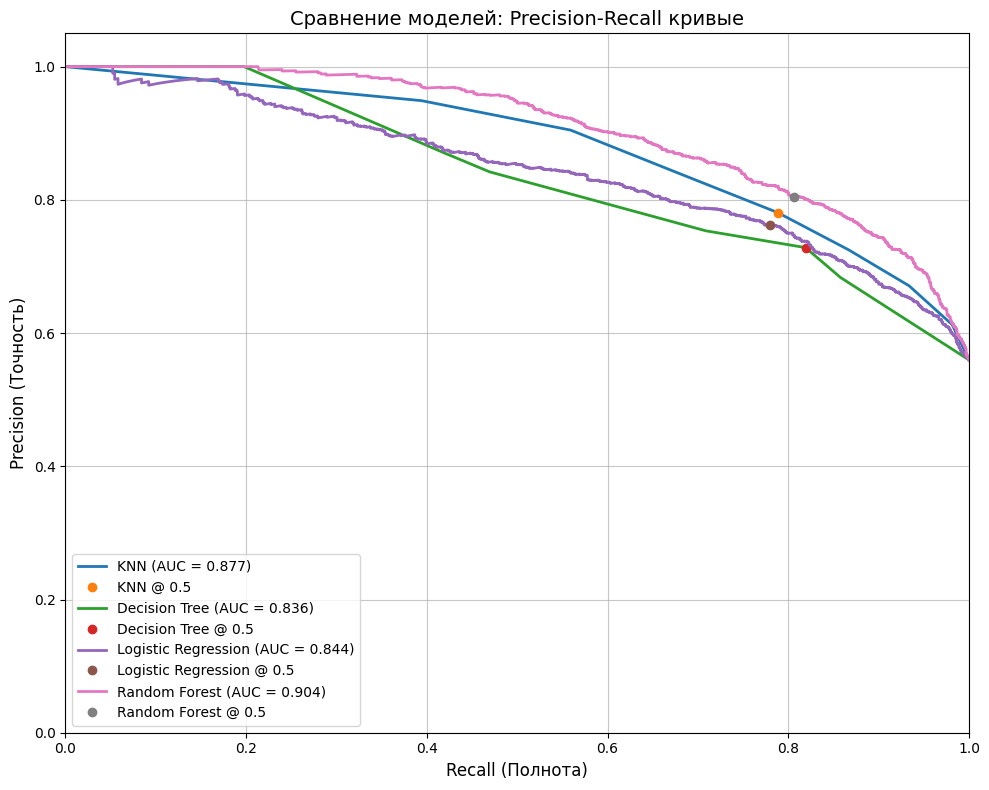

In [ ]:
# Задание 12
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Список названий моделей
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']

plt.figure(figsize=(10, 8))

for name in model_names:
    # Получаем истинные метки и вероятности
    y_true = y_test
    y_scores = y_proba[name]

    # Вычисляем Precision, Recall, пороги
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

    # Вычисляем PR AUC
    pr_auc = auc(recall, precision)

    # Строим кривую
    plt.plot(recall, precision, linewidth=2, label=f'{name} (AUC = {pr_auc:.3f})')

    # Отмечаем точку при пороге 0.5 (если нужно)
    idx = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(recall[idx], precision[idx], 'o', markersize=6, label=f'{name} @ 0.5' if idx < len(recall) else '')

# Оформление графика
plt.xlabel('Recall (Полнота)', fontsize=12)
plt.ylabel('Precision (Точность)', fontsize=12)
plt.title('Сравнение моделей: Precision-Recall кривые', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='-', alpha=0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

Precision-Recall кривая (PR-кривая) — она показывает, как меняется точность (Precision) в зависимости от полноты (Recall) при разных порогах классификации.
График показывает, что: Random Forest — лучшая модель по PR AUC (0.904), её кривая самая высокая — значит, при любом уровне recall она даёт наибольшую precision.
KNN — вторая по качеству (0.877), Логистическая регрессия и дерево решений — чуть хуже (0.844 и 0.836), Точки @ 0.5 показывают, что все модели работают хорошо при стандартном пороге.